
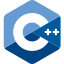
<br>

<div style="text-align:center; font-size:200%;">
 <b>Ausnahmebehandlung</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 13 Ausnahmebehandlung.ipynb -->
<!-- slides/module_180_error_handling/topic_130_handling_exceptions.cpp -->


# Behandeln von Exceptions

Wir haben die folgende Funktion zur Berechnung ganzzahliger Quadratwurzeln
definiert, die einen `domain_error` auslöst, falls `n` keine Quadratzahl ist:

In [ ]:
#include <stdexcept>

In [ ]:
int int_sqrt(int n) {
    for (int m = 0; m <= n; ++m) {
        if (m * m == n) {
            return m;
        }
    }
    throw std::domain_error("not a square number");
}


Wir konnten diese Funktion dann so verwenden:

In [ ]:
#include <iostream>

void print_int_sqrt_or_throw(int n) {
    int root{int_sqrt(n)};
    std::cout << "The root of " << n << " is " << root << ".\n";
}

In [ ]:
print_int_sqrt_or_throw(9)

In [ ]:
// print_int_sqrt_or_throw(8)


Wie schreiben wir damit eine `print_int_sqrt()`-Funktion, die keinen Fehler
auslöst, wenn `n` keine Quadratzahl ist?

In [ ]:
void print_int_sqrt(int n) {
    int root{int_sqrt(n)};
    std::cout << "The root of " << n << " is " << root << ".\n";
}

In [ ]:
print_int_sqrt(9)

In [ ]:
print_int_sqrt(8)


## Ausnahmebehandlung

- Ausnahmen können mit einem `try`/`catch`-Block behandelt werden
- Alle "passenden" Ausnahmen, die während der Ausführung des `try`-Blocks
  ausgelöst werden, führen zur Ausführung des `catch`-Blocks
- Wir sagen, die Ausnahme wurde behandelt
- Nach der Behandlung der Ausnahme wird das Programm nach dem `try`/`catch`-Block
  weiter ausgeführt


## Workshop: Bank Account (Teil 2)

Wir haben eine Klasse `BankAccount` definiert, die in folgenden Fällen einen
`std::domain_error` auslöst:

- Wenn ein neuer `BankAccount` mit negativer `balance` angelegt werden soll.
- Wenn `deposit` mit einem negativen Wert aufgerufen wird.
- Wenn `withdraw` mit einem negativen Wert aufgerufen wird oder durch das
  Abheben des Betrags die `balance` des Kontos negativ werden würde.


Testen Sie die Funktionalität der Klasse sowohl für erfolgreiche
Transaktionen, als auch für Transaktionen, die Exceptions auslösen.
Behandeln Sie dabei die Ausnahmen, die ausgelöst werden und geben Sie
eine sinnvolle Nachricht aus.

In [ ]:
class BankAccount
{
public:
    BankAccount(double balance);

    void deposit(double amount);
    void withdraw(double amount);

    double balance() const;

private:
    double balance_;
}

In [ ]:
BankAccount::BankAccount(double balance) : balance_(balance) {
    if (balance < 0) {
        throw std::domain_error(
            "Cannot create an account with negative balance.");
    }
}

In [ ]:
void BankAccount::deposit(double amount) {
    if (amount < 0) {
        throw std::domain_error("Cannot deposit a negative amount.");
    }
    balance_ += amount;
}

In [ ]:
void BankAccount::withdraw(double amount) {
    if (amount < 0) {
        throw std::domain_error("Cannot withdraw a negative amount.");
    }
    if (balance_ - amount < 0) {
        throw std::domain_error("Cannot withdraw more than the balance.");
    }
    balance_ -= amount;
}

In [ ]:
double BankAccount::balance() const {
    return balance_;
}